<a href="https://colab.research.google.com/github/r4phael/ml-course/blob/master/notebooks/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando libs

In [0]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap

Importando funções

In [0]:
# Função que calcula acurácia do modelo
def accuracy (tp, fp, fn, tn):
    accuracy = ((tp + tn) / (tp + tn + fp + fn))
    return (accuracy) 

# Função que calcula a precisão 
def precision (tp, fp):
    precision =  (tp / (tp + fp))
    return precision

# Função que calcula o recall
def recall(tp, fn):
    recall =  (tp / (tp + fn))
    return recall

# Função que calcula o f-measure (media harmonica entre precision e recall)
def f_measure(tp, fp, fn):
    f_measure = (2 * precision(tp, fp) * recall(tp, fn)) / (recall(tp, fn) + precision(tp, fp))
    return f_measure

# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

# Função que gera o gráfico dos resultados de classificação
def plot_results_class(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Idade')
    plt.ylabel('Tarifa')
    plt.legend()
    plt.show()

Importando os dados

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/r4phael/ml-course/master/data/titanic.csv')

Descrevendo o dataset

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualizando o dataset

In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preenchendo os valores númericos nulos (NA) com a mediana.

In [0]:
df = df.fillna(df.median())

Definindo as variáveis dependentes/independentes.

In [0]:
X = df.iloc[:, [5, 9]].values
y = df.iloc[:, 1].values

 Criando os subconjuntos de treinamento e testes

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Normalizando as features 

In [0]:
X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

Treinando o modelo de Árvore de Decisão com o Conjunto de Treinamento

In [25]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Prevendo os resultados do modelo criado com o conjunto de testes

In [0]:
y_pred = classifier.predict(X_test)

Criando a matriz de confusão com o conjunto de testes 

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

Visualizando a métrica de acurácia através das funções criandas e da bibilioteca sklearn

In [28]:
accuracy(tp, fp, fn, tn)
classifier.score(X_test, y_test)

0.5754189944134078

Exibindo o f-measure

In [33]:
f_measure(tp, fp, fn)
f1_score(y_test, y_pred)  

0.5

Exibindo os resultados do conjunto de treinamento

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


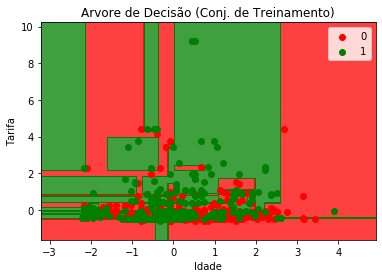

In [37]:
plot_results_class(X_train, y_train, classifier, 'Arvore de Decisão (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


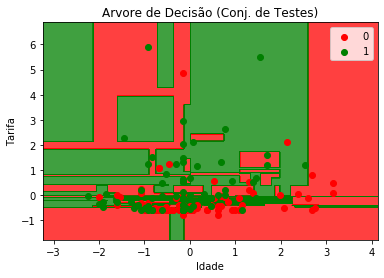

In [38]:
plot_results_class(X_test, y_test, classifier, 'Arvore de Decisão (Conj. de Testes)')